In [1]:
#2.1
import pickle as pkl

In [2]:
from sklearn.datasets import load_iris 
iris = load_iris(as_frame=True)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

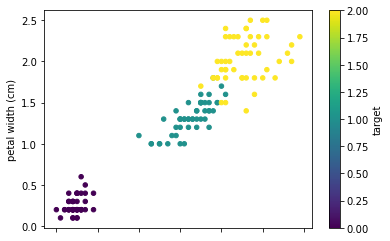

In [3]:
import pandas as pd
pd.concat([iris.data, iris.target], axis=1).plot.scatter(
    x='petal length (cm)',
    y='petal width (cm)',
    c='target',
    colormap='viridis'
)

In [4]:
X = iris.data.iloc[:, 2:4]
y = iris.target

In [5]:
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import numpy as np
from sklearn.linear_model import Perceptron

per_acc = []
per_wght = []

for i in range(3):
    Xi_train = X_train
    yi_train = (y_train == i).astype(int)
    Xi_test = X_test
    yi_test = (y_test == i).astype(int)
    per_clf = Perceptron()
    per_clf.fit(Xi_train, yi_train)
    per_acc.append((per_clf.score(Xi_train,yi_train),per_clf.score(Xi_test,yi_test)))
    per_wght.append((per_clf.intercept_[0],per_clf.coef_[0,0],per_clf.coef_[0,1]))

In [9]:
per_acc
fileObject = open("per_acc.pkl", 'wb')
pkl.dump(per_acc, fileObject)
fileObject.close()

In [10]:
per_wght
fileObject = open("per_wght.pkl", 'wb')
pkl.dump(per_wght, fileObject)
fileObject.close()

In [11]:
#2.2

In [12]:
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([0,1, 1, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#uczenie
per_clf = Perceptron()
per_clf.fit(X_train, y_train)
print(per_clf.predict([[0,0]]))
print(per_clf.predict([[0,1]]))
print(per_clf.predict([[1,0]]))
print(per_clf.predict([[1,1]]))

[0]
[0]
[1]
[0]


In [14]:
per_clf.coef_

array([[ 2., -3.]])

In [15]:
#2.3
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential()

In [16]:
#warstwa wejściowa
model.add(tf.keras.layers.Flatten(input_dim = 2))

In [17]:
#jedna warstwa ukryta
model.add(tf.keras.layers.Dense(2,input_dim = 2,  activation='tanh', use_bias=True))

In [18]:
#warstwa wyjściowa
model.add(tf.keras.layers.Dense(1, activation="sigmoid", use_bias=True))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',
optimizer='SGD')

In [21]:
history = model.fit(X_train, y_train, epochs=100, verbose=False)
print(history.history['loss'])

[0.72735995054245, 0.7271239757537842, 0.7268888354301453, 0.7266543507575989, 0.7264208197593689, 0.7261879444122314, 0.7259559035301208, 0.7257246375083923, 0.7254940867424011, 0.7252643704414368, 0.7250354290008545, 0.7248072624206543, 0.7245798110961914, 0.7243531346321106, 0.7241272330284119, 0.7239020466804504, 0.7236776351928711, 0.7234539985656738, 0.7232310771942139, 0.7230088710784912, 0.7227873802185059, 0.7225666642189026, 0.7223466038703918, 0.7221274375915527, 0.7219088673591614, 0.7216910719871521, 0.7214739322662354, 0.7212575078010559, 0.7210418581962585, 0.7208268046379089, 0.7206125855445862, 0.7203989624977112, 0.720186173915863, 0.7199739813804626, 0.7197625041007996, 0.7195517420768738, 0.719341516494751, 0.719132125377655, 0.7189233899116516, 0.7187153697013855, 0.7185079455375671, 0.7183012366294861, 0.7180951237678528, 0.7178897857666016, 0.7176850438117981, 0.7174809575080872, 0.7172777056694031, 0.7170748710632324, 0.7168727517127991, 0.7166712880134583, 0.71

In [22]:
model.get_weights()

[array([[ 1.0144215 , -0.29350552],
        [ 0.24197417,  0.0526593 ]], dtype=float32),
 array([ 0.08876363, -0.00189677], dtype=float32),
 array([[-0.80092436],
        [ 0.01295045]], dtype=float32),
 array([-0.04549593], dtype=float32)]

In [23]:
model.predict(X)

array([[0.47092602],
       [0.42543992],
       [0.33375126],
       [0.3213203 ]], dtype=float32)

In [24]:
model.predict(X)[1][0]

0.42543992

In [25]:
act=['sigmoid','tanh','relu']
#opt = ['SGD','Adam']
loss_f = ['binary_crossentropy','MAE']

In [26]:
def check_solution(y_pred,y):
    for i in range(len(y)):
        if y[i]==0:
            if y_pred[i][0] >= 0.05 or y_pred[i][0]<= -0.05: return False
        if y[i]==1:
            if y_pred[i][0] <= 0.95 or y_pred[i][0] >= 1.05: return False
    return True

In [27]:
from random import randrange
while not check_solution(model.predict(X),y):
    model = keras.models.Sequential()
    #warstwa wejściowa
    model.add(tf.keras.layers.Flatten(input_dim = 2))
    #jedna warstwa ukryta
    model.add(tf.keras.layers.Dense(2,input_dim = 2,  activation=act[randrange(len(act))], use_bias=True))
    #warstwa wyjściowa
    model.add(tf.keras.layers.Dense(1, activation=act[randrange(len(act))], use_bias=True))
    model.compile(loss=loss_f[randrange(len(loss_f))], optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
    model.fit(X, y, epochs=100, verbose=False)        
    print(model.predict(X))

[[0.5388231]
 [0.5388231]
 [0.5388231]
 [0.5388231]]
[[0.       ]
 [1.0460689]
 [0.       ]
 [0.       ]]
[[-0.03558246]
 [ 0.68186384]
 [ 0.6815854 ]
 [ 0.6877246 ]]
[[0.       ]
 [1.2418818]
 [1.1191602]
 [0.       ]]
[[0.00413486]
 [0.99636376]
 [0.49645284]
 [0.49956205]]
[[ 0.06508791]
 [ 0.960688  ]
 [ 0.93820506]
 [-0.0042393 ]]
[[0.33341348]
 [0.9994714 ]
 [0.33341348]
 [0.33341348]]
[[0.5033962 ]
 [0.50188017]
 [0.50263923]
 [0.501016  ]]
[[-0.4069593 ]
 [ 0.99932057]
 [-0.99903214]
 [-0.74847907]]
[[0.       ]
 [1.5104094]
 [1.0279772]
 [0.       ]]
[[ 0.        ]
 [-0.15288593]
 [-0.76449484]
 [-0.55625284]]
[[-0.01051774]
 [ 0.9971514 ]
 [ 0.9974692 ]
 [ 0.9977965 ]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[0.67765623]
 [0.7736742 ]
 [0.801096  ]
 [0.89711404]]
[[-0.00806111]
 [ 0.97035676]
 [ 0.9542208 ]
 [-0.0517564 ]]
[[0.12455113]
 [0.21137807]
 [0.27849063]
 [0.36531758]]
[[0.       ]
 [1.7935619]
 [1.2830865]
 [2.6828816]]
[[0.       ]
 [1.930086 ]
 [1.0354561]
 [3.5873241]]
[[0.02

In [28]:
model.predict(X)

array([[0.0119352 ],
       [0.99310255],
       [0.9937985 ],
       [0.01118127]], dtype=float32)

In [29]:
mlp_xor_weights = model.get_weights()

In [31]:
print(mlp_xor_weights)

[array([[ 3.7089102, -4.885564 ],
       [ 3.6278281, -4.0553427]], dtype=float32), array([-5.413217 ,  2.0862062], dtype=float32), array([[-5.066076],
       [-5.003061]], dtype=float32), array([-4.6309714], dtype=float32)]


In [32]:
fileObject = open("mlp_xor_weights.pkl", 'wb')
pkl.dump(mlp_xor_weights, fileObject)
fileObject.close()